In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def importImage(imdir):
    
    im_array = plt.imread(imdir)
    im_array = (im_array * 255).astype(int)

    width = np.shape(im_array)[0]
    height = np.shape(im_array)[1]
    
    channels = np.shape(im_array)[2]
    
    return im_array, width, height, channels

In [3]:
image_dir = "./triangles-rgb.png"
original, width, height, channels = importImage(image_dir)
print("image : ", np.shape(original))

k = 3
print("k = ", k)

image :  (100, 100, 4)
k =  3


In [4]:
centroids = []
for a in range(3):
    centroids.append(np.linspace(np.amin(original[:,:,a]),
            np.amax(original[:,:,a]), num = k).astype(int))
centroids = np.asarray(centroids)
print("centroids : ", np.shape(centroids))
print(centroids)

centroids :  (3, 3)
[[  1 128 255]
 [  0  91 183]
 [  0  95 191]]


In [5]:
def getDistances(array, centroids):
    """ distance -> (channel, width, height, centroid)  """
    
    distances = []
    
    for a in range(3):
        # for each channel, we calculate the difference between each pixel and the centroids
        temp_dists = np.zeros((height, width, k))
        
        for b in range(k):
            
            temp_dists[:,:,b] = np.abs(array[:,:,a] - centroids[a,b])
            
        distances.append(temp_dists)
        
    distances = np.asarray(distances).astype(int)
    
    return distances

In [6]:
def getCurrent(distances, centroids):
    """
    distances : (3, 100, 100, 5)
    centroids : (3, 5)
    """
    
    current = np.zeros((height, width, 3))
    i = 0
    for (channel, cents) in zip(distances, centroids):
        
        for yy in range(height):
            for xx in range(width):
                
                current[yy, xx, i] = closest_centroid(channel[yy,xx,:], cents)
        i += 1
                
    return current.astype(int)

In [7]:
def closest_centroid(distances, centroids):
    """ can probably be included in getCurrent"""
    
    for a in range(len(centroids)):
        
        if distances[a] == np.amin(distances):
            
            return centroids[a]
        
    return False

In [8]:
def getCentroids(original, current, centroids):
    
    new_centroids = []
    
    for channel in range(3):
        summ = np.zeros(k, dtype=int)
        total = np.zeros(k, dtype=int)
        
        for yy in range(height):
            for xx in range(width):
                for cent in range(k):
                    
                    if current[yy, xx, channel] == centroids[channel, cent]:
                        summ[cent] += original[yy, xx, channel]
                        total[cent] += 1
        
        new_centroids.append((summ/total).astype(int))
                        
    return np.asarray(new_centroids)

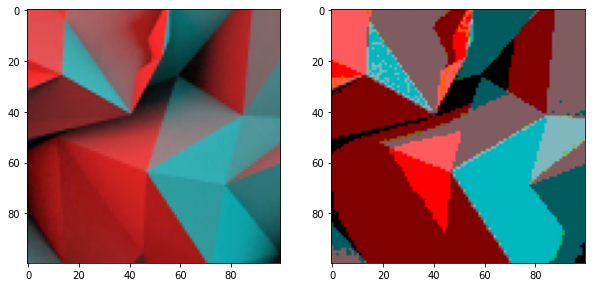

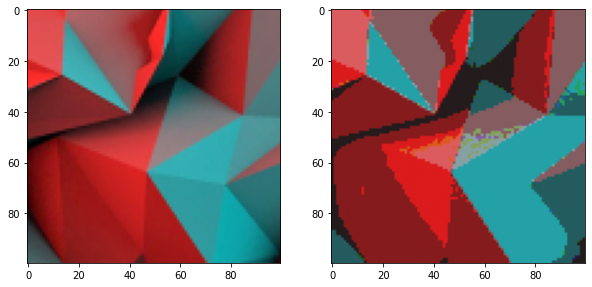

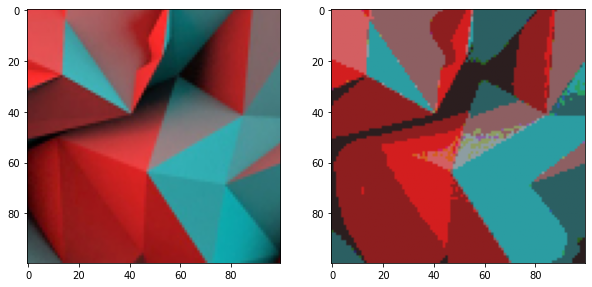

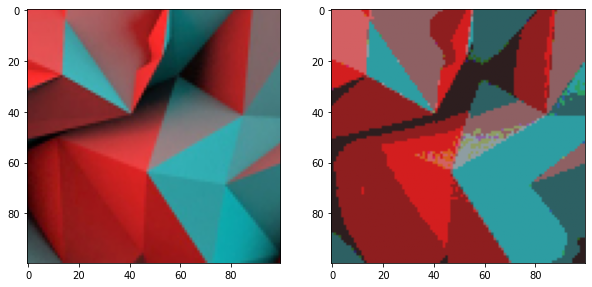

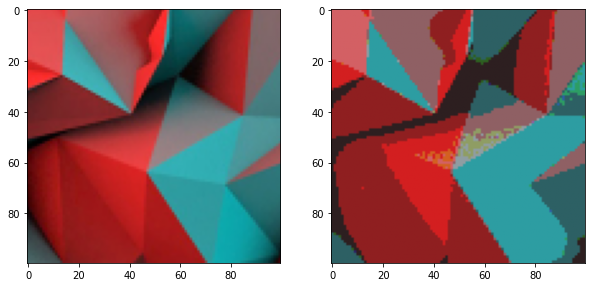

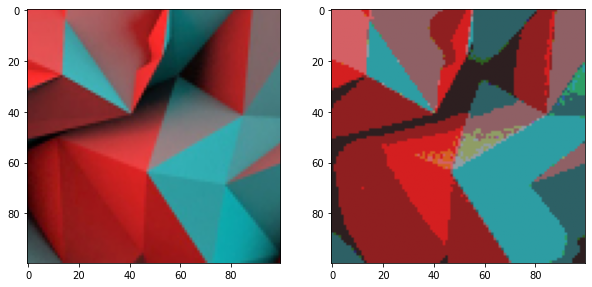

In [9]:
iteration = 0
max_iter = 5
while True:
    
    distances = getDistances(original, centroids)
    current = getCurrent(distances, centroids)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
    ax1.imshow((original/255), aspect = "equal" )
    ax2.imshow((current/255), aspect = "equal")
    
    if iteration == max_iter:
        break
    
    # update centroids
    centroids = getCentroids(original, current, centroids)
    
    iteration += 1